In [8]:
import requests
import time
import csv
import os.path
from os import mkdir as os_mkdir
from os import getcwd as os_getcwd
from matplotlib import pyplot as plt
import datetime
import numpy as np
from selenium import webdriver
from bs4 import BeautifulSoup

In [9]:
def create_folder_structure():
    #checks if the data/$WEEKDAY folders exists
    #if not, creates them
    if os.path.isdir('data') == True:
        print('data folder exists already. skipping...')
    else:
        os_mkdir('data')
    weekdays = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
    for day in weekdays:
        path = os.path.join('data',day)
        if os.path.isdir(path) == True: 
            print(path + ' exists already. skipping...')
        elif os.path.isdir(path) == False: 
            os_mkdir(path)

In [10]:
def get_current_peoplecount():
    #uses the b12 homepage to check the current amount of people training
    #returns people-count as integer
    #returns an array
    #example output for 8:15am with 13 people : [0815,13]
    
    page_string = "http://b12-tuebingen.de/"
    
    #define webdriver options
    options = webdriver.ChromeOptions()
    options.add_argument('--ignore-certificate-errors')
    options.add_argument('--incognito')
    options.add_argument('--headless')
    current_path = os_getcwd()
    driver_path = str(current_path + '/chromedriver_mac')
    driver = webdriver.Chrome(driver_path, options=options)
    
    #render the webpage headless and parse the source to beautiful soup
    driver.get(page_string)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    #gets the utilization string from the homepage and extracts the number
    people_count_text = soup.select_one("div[class=status_text]").text
    people_count_integer = people_count_text.strip().split(' ')[0]
    current_time = datetime.datetime.now().strftime("%H%M")
    
    result = [current_time, people_count_integer]
    
    return result
    
    
    

In [11]:
def write_to_file(results):
    #write the data in a file
    #filepath is ./data/$weekday/$date.out
    
    now = datetime.datetime.now()
    weekday = now.strftime("%a").lower()
    date = now.strftime("%y_%m_%d")
    
    path_to_file = os.path.join('data',weekday,date)
    
    #runs as long as the user or something else breaks it
    print("Writing to : " + str(path_to_file) + " at: " + str(results[0]))
    with open(path_to_file, 'a') as file: 
        pars_string = str(results[0]+','+results[1]+'\n')
        file.write(pars_string)

In [12]:
def go_to_sleep(sleep_timer):
    #waits the specified amount of time
    time.sleep(sleep_timer)

In [13]:
def main():
    create_folder_structure()
    while True:
        try:
            b12_results = get_current_peoplecount()
            write_to_file(b12_results)
        except:
            print("something with the webpage was of. skipping...")
        go_to_sleep(10)
    

In [7]:
main()

data folder exists already. skipping...
data/mon exists already. skipping...
data/tue exists already. skipping...
data/wed exists already. skipping...
data/thu exists already. skipping...
data/fri exists already. skipping...
data/sat exists already. skipping...
data/sun exists already. skipping...
Writing to : data/sun/21_12_05 at: 1656


KeyboardInterrupt: 

In [15]:
def create_output_figure(daily_data, opening, closing, output_fig):
    #creates a figure based on daily data and the opening and closing hours
    #time-format needs to be integer as follows: 9:00 = 900, 23:00 = 2300
    utilization = []
    with open(daily_data, 'r') as util_file:
        reader = csv.reader(util_file)
        for row in reader:
            utilization.append(row)
        
    
    #filter utilization array so that it doesnt show values where b12 is closed
    utilization = list(filter(lambda x: int(x[0])>opening and int(x[0])<closing,utilization))

    time = [x[0] for x in utilization]
    people = [105 - int(x[1]) for x in utilization]
    
    #create a string from the time-values for nicer plotting
    time_string = []
    for timestamp in time: 
        hours   = timestamp[:2]
        minutes = timestamp[-2:]
        time_string.append(str(hours + ':' + minutes))
    
    
    #Plotting
    fig = plt.figure(figsize=[20,10])
    fig.patch.set_facecolor('white')
    ax1 = fig.add_subplot(111)
    ax1.set_title("B12 - Personenanzahl")
    ax1.title.set_fontsize(20)
    ax1.set_ylabel("Personen", fontsize = 20)
    ax1.set_xlabel("Uhrzeit", fontsize = 20)
    ax1.set_yticks(np.arange(0,110,10))
    ax1.set_ylim([0,105])
    ax1.plot(time_string, people, 'r', linewidth = 2)
    plt.gcf()
    plt.savefig(output_fig)
    plt.close()

In [16]:
create_output_figure('21_12_05.test',930, 2200,'test.png')

FileNotFoundError: [Errno 2] No such file or directory: '21_12_05.test'

#just some scrambling about plotting

In [29]:
daily_util = '21_12_05.test'
utilization = []
with open(daily_util, 'r') as util_file:
    reader = csv.reader(util_file)
    for row in reader:
        utilization.append(row)

#filter utilization array so that it doesnt show values where b12 is closed
utilization = list(filter(lambda x: int(x[0])>930 and int(x[0])<2300,utilization))

time = [x[0] for x in utilization]
people = [105 - int(x[1]) for x in utilization]

In [30]:
time_string = []
for timestamp in time: 
    hours   = timestamp[:2]
    minutes = timestamp[-2:]
    time_string.append(str(hours + ':' + minutes))

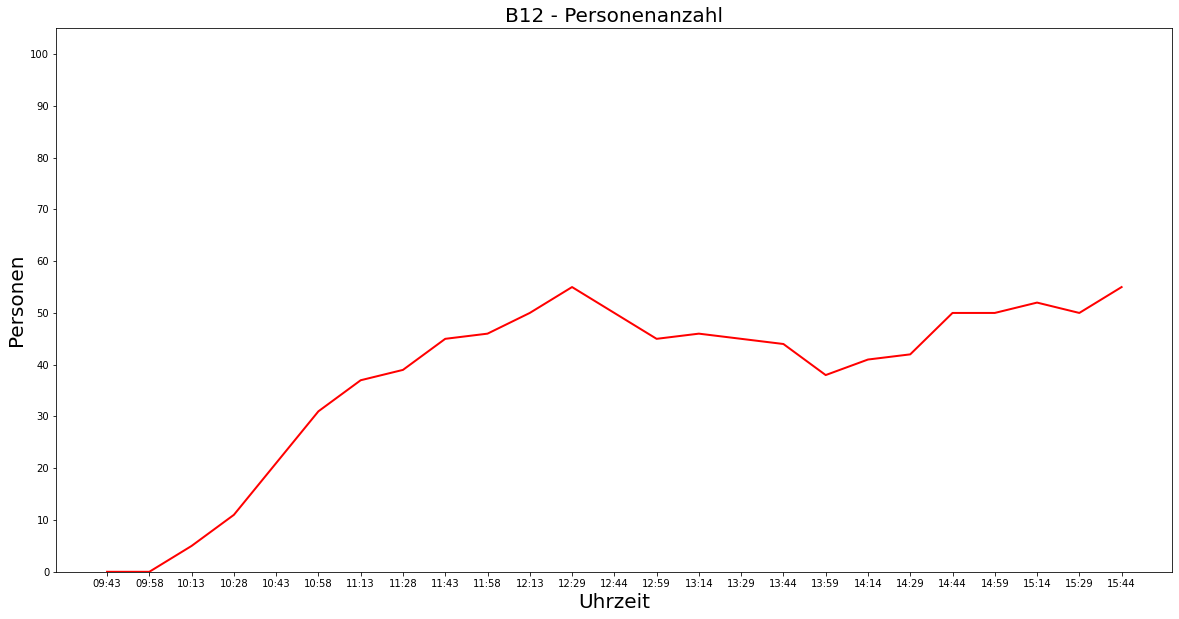

In [31]:
fig = plt.figure(figsize=[20,10])
ax1 = fig.add_subplot(111)
ax1.set_title("B12 - Personenanzahl")
ax1.title.set_fontsize(20)
ax1.set_ylabel("Personen", fontsize = 20)
ax1.set_xlabel("Uhrzeit", fontsize = 20)
ax1.set_yticks(np.arange(0,110,10))
ax1.set_ylim([0,105])
ax1.plot(time_string, people, 'r', linewidth = 2)